<a href="https://colab.research.google.com/github/mori-assereto/DataAlchemy/blob/main/Predictive_Property_Price_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

You have recently joined the Data team of a major real estate company. The first task assigned to you is to assist the appraisers in valuing properties, as it is a challenging and sometimes subjective process. To accomplish this, you propose to create a Machine Learning model that, given certain property features, predicts its selling price.

# Part 1 - Thinking like a Data Scientist


## Context
The real estate agency we are joining operates in Argentina, to be more specific, in areas within the province of Buenos Aires and the Autonomous City of Buenos Aires.

Argentina is a country where due to inflation and currency devaluation, properties are often valued in US dollars (USD).

The location, neighborhood, or district can be crucial factors that generate significant price variations. For instance, a studio apartment in Palermo might have a similar price to a townhouse in the western suburbs.

When Argentinians choose a property, they usually consider factors like location or area, price, type of housing, and number of rooms.

## Data that could help address the problem
* **Price per square meter in dollars by area:** Each area and locality will have a specific price, which can vary greatly.
* **Type of housing:** Whether it's a house, apartment, studio, or townhouse, among other options.
* **Number of rooms and bathrooms**
* **Constructed and uncovered square meters:** Depending on the type of housing and the client's preferences, they might be interested in less constructed space for modifications or in a building with a covered rather than uncovered parking space.
* Whether the property owner wants to **rent or sell**: The difference between these two categories can be significant for the same area. It wouldn't be appropriate to consider rental properties to determine sale prices, as it could introduce a large error into our model.
* **Amenities:** Pool, multipurpose room, grill area, parking space, gym, etc. These features can lead to a price increase and can cause two properties located in the same area with similar characteristics to have different prices.
* **Age or condition of the property:** Refers to the maintenance condition of the property.

We could classify these data into two groups:
* **Price**
* **Characteristics of our property**

The various combinations of these factors will enable us to address our challenge and develop a Machine Learning model that predicts the selling price.

The sources of this data will be databases or real estate portals in Argentina.

# Part 2 - Exploratory Data Analysis

In this section, you are required to perform an Exploratory Data Analysis (EDA) on the Properati properties dataset. It's important that you address the following questions during your analysis:

* What is the size of the dataset? How many instances and how many columns are there?
* How many missing values are there in each column?
* What is the distribution of each variable? You should create histograms for numerical variables and bar charts for categorical variables.
* How do the variables relate to each other? What type of chart/graph would be suitable for presenting this information?
* How are the numerical variables correlated? What type of chart/graph would be suitable for presenting this information? Which variables are likely to be the best predictors of the target variable?

You will find instructions to answer these questions. It's important to note that these instructions represent the **minimum deliverable** expected for this task.

**Comments about the dataset**
1. We have already performed some data cleaning (*curado*) on the dataset, which you can download directly from the Properati website. Many of the steps we took to clean the dataset will be covered in Block 2 of the course.

2. If you have questions about what any of the columns represent, you can refer to [here](https://www.properati.com.ar/data/). You will notice that some columns have been discarded.

3. `Capital Federal` refers to the Autonomous City of Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur`, and `Bs.As. G.B.A. Zona Oeste` are regions that make up the [Greater Buenos Aires](https://en.wikipedia.org/wiki/Greater_Buenos_Aires) area, a collection of cities surrounding the Autonomous City of Buenos Aires.


The following bullet points aim to answer *who built this dataset, when, why, and how?* These questions will provide us with an initial idea of the type of data we will encounter in our dataset and contextualize the information.

1. The dataset we will use is from Properati, a real estate search website in Latin America. The dataset includes a specific data area dedicated to collecting information from this organization. As a result, the dataset will not only contain basic property information but also data related to the property's listing or posting on the website. These additional data points are mainly linked to Properati's business strategy and type of operation.
   
2. Acámica has already performed data curation on the dataset, which means that the raw data provided by Properati has been processed to prepare it for subsequent analysis and information extraction.
   
3. The dataset was constructed with the purpose of being used to address the problem previously outlined. Its exploration allows us to determine which data contribute value to our Machine Learning model for predicting property sale prices.

Now that we have a better understanding of what we will be dealing with, let's begin with **Exploratory Data Analysis (EDA)**. This stage consists of several steps and aims to reveal the characteristics of our dataset.


### 2.1. We import the necessary libraries for Exploratory Data Analysis (EDA).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

### 2.2. We load the dataset.

In [ ]:
df_properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

### 2.3. General Dataset Information

#### Number of Rows and Columns

In [ ]:
df_properati.shape

(146660, 19)

#### First 5 Instances

In [ ]:
df_properati.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


#### Data Characteristics

##### Column Names

In [ ]:
df_properati.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

##### Data Type

In [ ]:
df_properati.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

We have **8** quantitative or numerical variables and **11** categorical (qualitative) variables.

##### What Each Column Represents

| Column Name | Meaning |
|-------------|---------|
| start_date | Date the listing was created |
| end_date | Date the listing was removed |
| created_on | Date the first version of the listing was created |
| lat | Latitude |
| lon | Longitude |
| l1 | Country |
| l2 | Region |
| l3 | Locality |
| rooms | Number of rooms |
| bedrooms | Number of bedrooms |
| bathrooms | Number of bathrooms |
| surface_total | Total surface area in square meters |
| surface_covered | Covered surface area in square meters |
| price | Listed price in the advertisement |
| currency | Currency of the listed price |
| title | Advertisement title |
| description | Advertisement description |
| property_type | Type of property |
| operation_type | Type of operation |

*What We Should Do:*
* Rename the columns `l1, l2, and l3` to make their names more representative.
* Verify that we have only one type of currency (`currency`) and determine what it is. This will ensure that when using the `price` variable to establish various relationships, we are speaking the same language across all records. If this condition is not met, we should consider converting all values to a single currency or eliminating records that do not comply with the mentioned condition.
* Remove columns related to property listing on the website, such as `title`, `description`, `start_date`, `end_date`, or `created_on`.
* Determine the possible values for columns with the word "type" in their name (`property_type` and `operation_type`).
* Check that country, region, and locality data are not null. Explore the possibility of using latitudes and longitudes to fill in missing values.
* Ensure that the condition of total surface area being greater than covered surface area is met.
* Examine the possible values for `l1, l2, and l3`, ensuring that `l1` corresponds to a single country.

##### Dataset Indexing

In [ ]:
df_properati.index

RangeIndex(start=0, stop=146660, step=1)

##### Null values

In [ ]:
df_properati.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Given that the columns `l1, l2, and l3` are not null, and if there are values of this type in `lat and lon`, we could decide to eliminate these columns unless we want to create a map or geographical visualization. Having null values in `bathrooms, surface_total, or surface_covered` is not ideal; we should investigate these cases more thoroughly to determine the best approach for handling them. It's worth noting that `price` and `rooms` do not have any null values.

##### Renaming L1, L2, and L3 Columns

In [ ]:
df_properati = df_properati.rename(columns={"l1": "country", "l2": "region", "l3": "location"})
df_properati.head(5)

,start_date,end_date,created_on,lat,lon,country,region,location,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


##### Possible Values
*Property type*  
Number of property types

In [ ]:
df_properati['property_type'].nunique()

10

##### Possible Values:

In [ ]:
df_properati['property_type'].unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

*Operation type*  
Number of operation types

In [ ]:
df_properati['operation_type'].nunique()

1

Possible Values

In [ ]:
df_properati['operation_type'].unique()

array(['Venta'], dtype=object)

*Currency*  
Possible Values

In [ ]:
df_properati['currency'].unique()

array(['USD'], dtype=object)

*Country, Region & Location*  
Possible Values of country, region y location

In [ ]:
print("Valores de country:",df_properati['country'].unique())

print("Valores de region:",df_properati['region'].unique())
print("Cantidad de valores de region:",df_properati['region'].nunique())

print("Valores de location:",df_properati['location'].unique())
print("Cantidad de valores de location:",df_properati['location'].nunique())

Valores de country: ['Argentina']
Valores de region: ['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Oeste']
Cantidad de valores de region: 4
Valores de location: ['San Cristobal' 'Boedo' 'Palermo' 'La Plata' 'Villa Crespo'
 'Parque Patricios' 'Villa Pueyrredón' 'Pilar' 'Tigre' 'Abasto' 'Flores'
 'Morón' 'Nuñez' 'Almagro' 'Belgrano' 'Floresta' 'Recoleta' 'Balvanera'
 'Caballito' 'Chacarita' 'San Telmo' 'Colegiales' 'La Matanza'
 'San Isidro' 'San Miguel' 'Villa Luro' 'Barrio Norte' 'Las Cañitas'
 'San Nicolás' 'Villa Urquiza' 'Vicente López' 'Parque Centenario'
 'General San Martín' 'Villa General Mitre' 'Lanús' 'Ituzaingó' 'Boca'
 'Once' 'Retiro' 'Monserrat' 'Avellaneda' 'San Fernando' 'Puerto Madero'
 'Villa Ortuzar' 'Parque Chacabuco' 'Centro / Microcentro'
 'Tres de Febrero' 'Liniers' 'Coghlan' 'Congreso' 'Paternal' 'Saavedra'
 'Villa Santa Rita' 'Barracas' 'Villa Lugano' 'Constitución' 'Mataderos'
 'Villa Devoto' 'Parque Avellaneda' 'Vil

###### Verifying that the value of total surface area is greater than covered surface area

In [ ]:
mask_surface = (df_properati.surface_total >= df_properati.surface_covered)

df_surface = df_properati[mask_surface]

print("Tamaño del data frame original:", df_properati.shape, "vs el tamaño del data frame filtrando condición de la superficie total sea mayor a la superfice cubierta",df_surface.shape)

Tamaño del data frame original: (146660, 19) vs el tamaño del data frame filtrando condición de la superficie total sea mayor a la superfice cubierta (123099, 19)


Given that the number has decreased, we can conclude that the condition is not met for all records.

**Data Characteristics Summary**
* The dataframe only contains records corresponding to property sales.
* We have 10 types of properties.
* The price is in a single currency, USD.
* There are no naming errors in the columns for region, country, and location.
* All records are from Argentina.
* Region can take 4 values, while location can take 89 values.
* When applying the condition that total surface area should be greater than covered surface area, the dataframe size reduced from 146,660 to 123,099, indicating that the condition is not met for all cases.

#### Property Type Analysis

Since `property_type` does not have any null values, if I want to know the count of instances for each property type, I can quickly and easily obtain the desired value by counting the values of another non-null column, such as `price`.

In [ ]:
print("Cantidad de instancias por tipo de propiedad\n",df_properati['property_type'].value_counts())

Cantidad de instancias por tipo de propiedad
 Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


The property types "House," "Apartment," and "PH" are the three largest categories in terms of the number of listings.

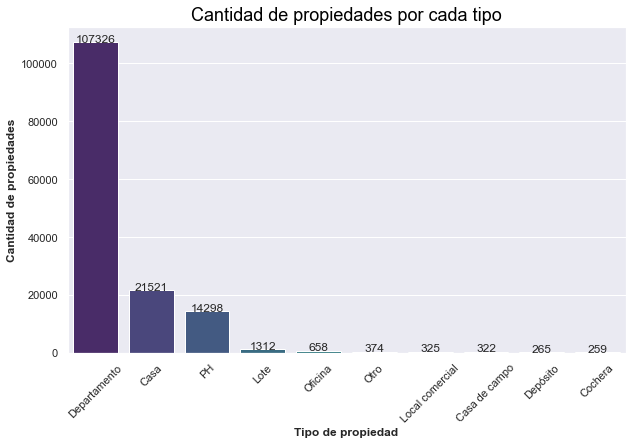

In [ ]:
plt.figure(figsize = (10,6))

graph = sns.countplot(data = df_properati, x="property_type",
            order = df_properati['property_type'].value_counts().index,
            palette="viridis"
           )
plt.xticks(rotation = 45)
plt.xlabel("Tipo de propiedad", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por cada tipo", fontsize=18, color="black")

# Set values on top of the bar
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df_properati['property_type'].value_counts()[i],ha="center")
    i += 1

Let's analyze the main statistics considering price and total surface area.

_Price_

In [ ]:
# Definimos un data frame agrupado por tipo de propiedad

df_property = df_properati.groupby(['property_type'])

print("Estadisticos del tipo de propiedad considerando únicamente el precio\n",df_property[['price']].describe())

Estadisticos del tipo de propiedad considerando únicamente el precio
                     price                                                   \
                    count           mean           std      min        25%   
property_type                                                                
Casa              21521.0  275932.848427  2.847747e+05  10000.0  134000.00   
Casa de campo       322.0  212242.826087  1.280467e+05  57000.0  136000.00   
Cochera             259.0   24255.984556  2.071072e+04   8900.0   17000.00   
Departamento     107326.0  236746.743110  3.035206e+05   6000.0  110000.00   
Depósito            265.0  885932.075472  1.265361e+06  15000.0  230000.00   
Local comercial     325.0  449184.064615  9.101467e+05  10000.0  105000.00   
Lote               1312.0  386830.370427  7.077048e+05   5500.0   65000.00   
Oficina             658.0  183674.572948  1.715287e+05  25000.0   89000.00   
Otro                374.0  671686.697861  1.929032e+06  35000.0  155043.

In [ ]:
print("Estadisticos del tipo de propiedad considerando únicamente la superficie cubierta \n",
      df_property[['surface_total']].describe())

Estadisticos del tipo de propiedad considerando únicamente la superficie cubierta 
                 surface_total                                             \
                        count         mean           std    min      25%   
property_type                                                              
Casa                  16604.0   660.102807   3059.776312   11.0   200.00   
Casa de campo           258.0  4018.581395   7059.150819  120.0  1342.75   
Cochera                   2.0    13.500000      2.121320   12.0    12.75   
Departamento          93749.0    99.191757    644.799251   10.0    48.00   
Depósito                  8.0   624.375000    741.367450   20.0   300.25   
Local comercial          24.0   258.583333    503.909405   26.0    69.00   
Lote                    705.0  2481.002837  12137.501728   38.0   300.00   
Oficina                 394.0    81.956853     68.582193   15.0    40.25   
Otro                    220.0  8249.772727  24216.094942   38.0   167.00   
PH  

**Property Type Analysis Findings**
* The highest number of properties belong to the categories of "PH," "Apartment," and "House."
* A quick glance at the price and covered surface area statistics reveals a significant difference between the minimum and maximum values, as reinforced by the median and standard deviation. This suggests the presence of potential outliers.
* By evaluating the percentiles for each property type (PH, Apartment, and House) and comparing them to their maximum and minimum values, we can infer the possibility of outliers, as the P75 value in all three cases is less than the maximum.

#### Analyzing Regions and Localities

Text(0.5, 1.0, 'Cantidad de propiedades por localidad')

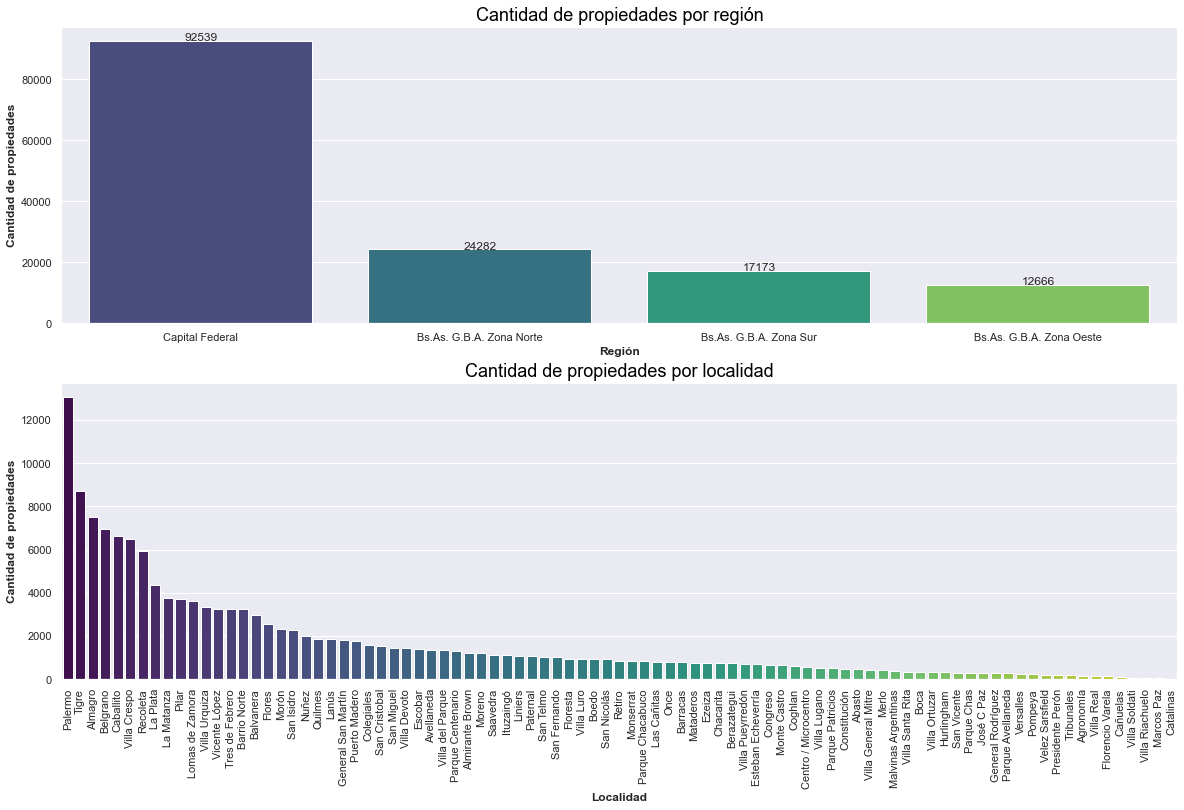

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(2,1,1)
graph = sns.countplot(data = df_properati, x="region",
            order = df_properati['region'].value_counts().index,
            palette="viridis"
           )
plt.xlabel("Región", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por región", fontsize=18, color="black")

# Set values on top of the bar
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df_properati['region'].value_counts()[i],ha="center")
    i += 1

plt.subplot(2,1,2)
sns.countplot(data = df_properati, x="location",
            order = df_properati['location'].value_counts().index,
            palette="viridis"
           )
plt.xticks(rotation = 90)
plt.xlabel("Localidad", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por localidad", fontsize=18, color="black")


**Property Type Analysis Findings**
* 66.37% of the properties are located in Capital Federal (Autonomous City of Buenos Aires).
* Palermo is the locality with the highest number of properties.

#### Filtering the Data Frame
We will generate a new Data Frame named `df_top_property_type_and_location` that will meet the following conditions:
1. The three most abundant property types (`property_type`): corresponds to apartment, house, and PH.
2. The region with the most published properties: Capital Federal (Autonomous City of Buenos Aires).

In [ ]:
# Máscara para quedarnos con las tres clases más abundantes de tipo de propiedad

mask_top_property_type = df_properati['property_type'].isin(["Departamento","Casa","PH"])

# Máscara para quedarnos con la región con más propiedades

mask_top_region = (df_properati['region'] == "Capital Federal")

# Nuevo Data Frame usando la condición de que ambas máscaras sean verdaderas

df_top_property_type_and_region = df_properati[(mask_top_property_type) & (mask_top_region)]

print("Tamaño del Data Frame:",df_top_property_type_and_region.shape)


Tamaño del Data Frame: (91485, 19)


#### Distributions and Pairwise Relationships

The dataframe we will use satisfies the following conditions:
1. All columns except `title`, `description`, `start_date`, `created_on`, `lat`, and `lon`.
2. Columns where the total surface area is greater than the covered surface area.
3. `l1`, `l2`, and `l3` renamed to `country`, `region`, and `location`.
4. The three most abundant property types (`property_type`): corresponds to apartment, house, and PH.
5. The region with the most published properties: Capital Federal (Autonomous City of Buenos Aires).

We will study the distribution and pairwise relationships of the variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, and `price` for each property type.

In [ ]:
# Máscara para quedarnos con los casos en los que la superficie total sea mayor a la cubierta

mask_surface_total_major = (df_properati.surface_total >= df_properati.surface_covered)

# Máscara para quedarnos con las tres clases más abundantes de tipo de propiedad
mask_top_property_type = df_properati['property_type'].isin(["Departamento","Casa","PH"])

# Máscara para quedarnos con la región con más propiedades

mask_top_region = (df_properati['region'] == "Capital Federal")

# Nuevo Data Frame usando la condición de que todas las máscaras sean verdaderas

df_properati_filter = df_properati[(mask_top_property_type) & (mask_top_region) & (mask_surface_total_major)]

# Seleccionamos las variables a estudiar y obtenemos los estadísticos

df_properati_filter[['rooms','bedrooms','bathrooms','surface_total','surface_covered', 'price']].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81291.000000,81291.000000,80458.000000,81291.000000,81291.000000,8.129100e+04
mean,3.004957,1.998745,1.554600,112.920348,92.261271,2.657606e+05
std,1.299796,1.045831,0.853083,988.263003,769.777375,3.337463e+05
min,1.000000,0.000000,1.000000,12.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.500000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


**Statistical Analysis**
* As the number of bathrooms is not equal to the other variables, we can conclude that it contains null values.
* There is a significant difference between the minimum and maximum values of `price`, `surface_total`, and `surface_covered`, indicating a high dispersion.
* Comparing the 75th percentile with the maximum value in all cases, the latter is more than double, suggesting the presence of outliers.

We will verify this last conclusion by creating a **boxplot**.

Text(0.5, 0, 'Baños')

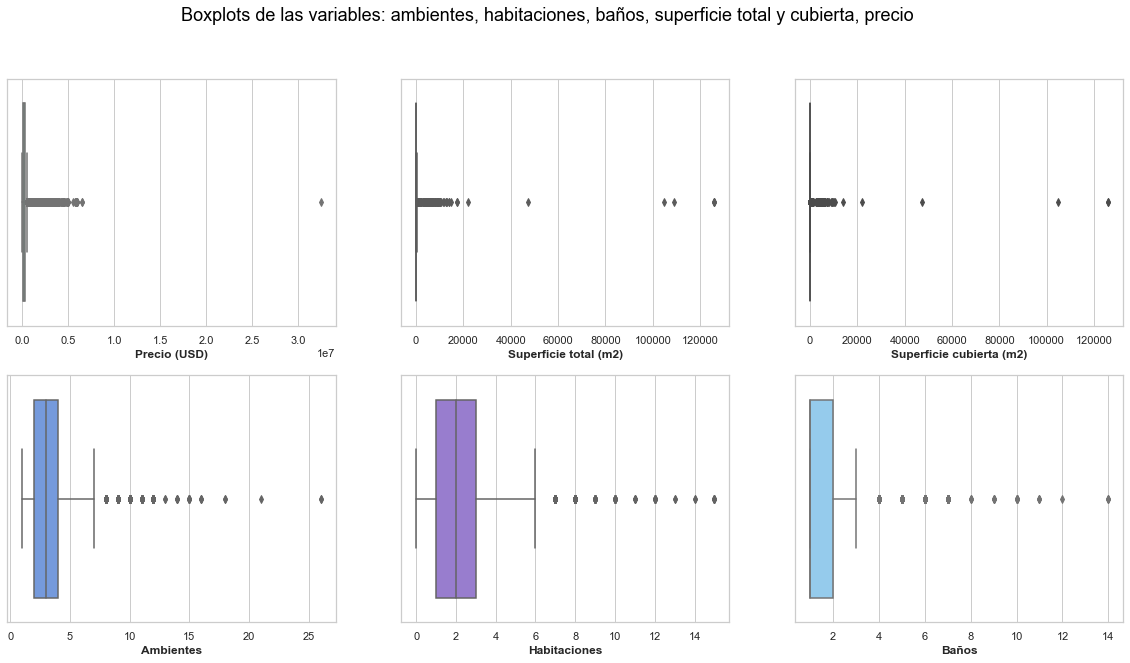

In [ ]:
plt.figure(figsize = (20,10))
sns.set_theme(style="whitegrid")
plt.suptitle("Boxplots de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "black")

plt.subplot(2,3,1)
sns.boxplot(x = df_properati_filter['price'], color = "aquamarine")
plt.xlabel("Precio (USD)", fontweight = "black", fontsize = 12)

plt.subplot(2,3,2)
sns.boxplot(x = df_properati_filter['surface_total'], color = "greenyellow")
plt.xlabel("Superficie total (m2)", fontweight = "black", fontsize = 12)

plt.subplot(2,3,3)
sns.boxplot(x = df_properati_filter['surface_covered'], color = "springgreen")
plt.xlabel("Superficie cubierta (m2)", fontweight = "black", fontsize = 12)

plt.subplot(2,3,4)
sns.boxplot(x = df_properati_filter['rooms'], color="cornflowerblue")
plt.xlabel("Ambientes", fontweight = "black", fontsize = 12)

plt.subplot(2,3,5)
sns.boxplot(x = df_properati_filter['bedrooms'], color="mediumpurple")
plt.xlabel("Habitaciones", fontweight = "black", fontsize = 12)

plt.subplot(2,3,6)
sns.boxplot(x = df_properati_filter['bathrooms'], color = "lightskyblue")
plt.xlabel("Baños", fontweight = "black", fontsize = 12)

Due to the significant dispersion of outliers in relation to the "box" in the boxplots for price, total surface area, and covered surface area, these plots are not clear.

To achieve a clearer visualization, we will use the **IQR (Interquartile Range)** method. The rules we will apply are:
* Below the 25th percentile - 1.5 * IQR
* Above the 75th percentile + 1.5 * IQR


In [ ]:
Q1 = df_properati_filter[['rooms','bedrooms','bathrooms','surface_total','surface_covered', 'price']].quantile(0.25)
Q3 = df_properati_filter[['rooms','bedrooms','bathrooms','surface_total','surface_covered', 'price']].quantile(0.75)
IQR = Q3 - Q1

df_properati_selection = df_properati_filter[~((df_properati_filter < (Q1 - 1.5 * IQR)) |(df_properati_filter > (Q3 + 1.5 * IQR))).any(axis=1)]

# Tamaño del data frame original
total = df_properati_filter.shape

# Tamaño del data frame usando el IQR
quantity = df_properati_selection.shape

percentage = (1-(quantity[0] / total[0]))*100

print("Porcentaje de datos que estoy excluyendo aplicando la regla ",round(percentage,2),"%")



Porcentaje de datos que estoy excluyendo aplicando la regla  13.18 %


Text(0.5, 0, 'Baños')

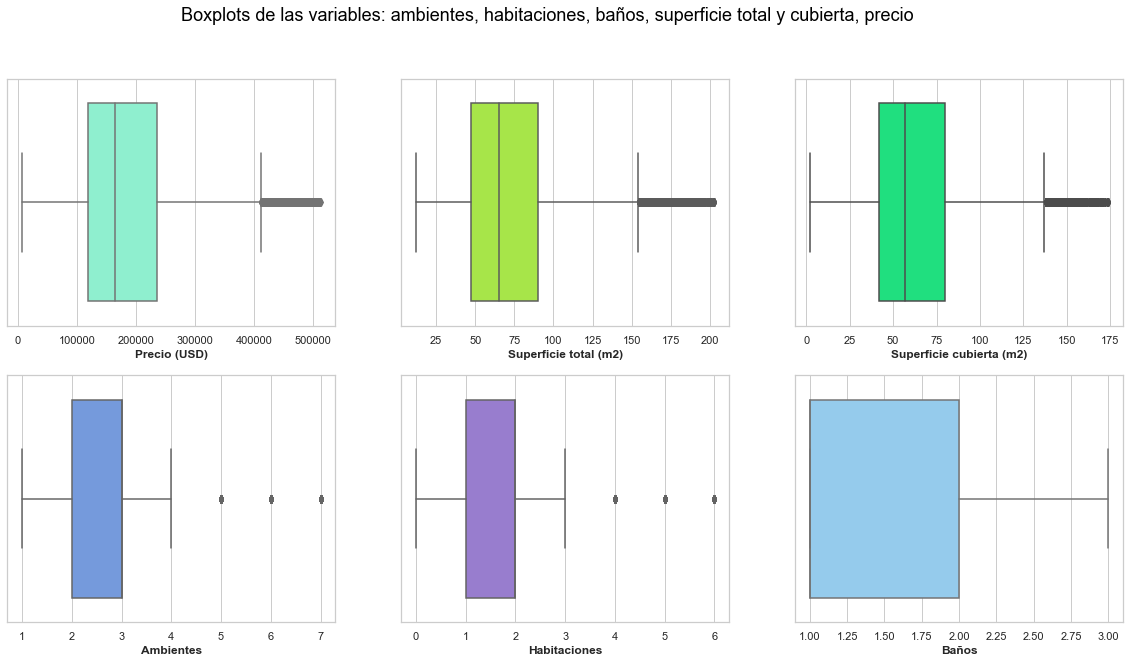

In [ ]:
plt.figure(figsize = (20,10))
sns.set_theme(style="whitegrid")
plt.suptitle("Boxplots de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "black")

plt.subplot(2,3,1)
sns.boxplot(x = df_properati_selection['price'], color = "aquamarine")
plt.xlabel("Precio (USD)", fontweight = "black", fontsize = 12)

plt.subplot(2,3,2)
sns.boxplot(x = df_properati_selection['surface_total'], color = "greenyellow")
plt.xlabel("Superficie total (m2)", fontweight = "black", fontsize = 12)

plt.subplot(2,3,3)
sns.boxplot(x = df_properati_selection['surface_covered'], color = "springgreen")
plt.xlabel("Superficie cubierta (m2)", fontweight = "black", fontsize = 12)

plt.subplot(2,3,4)
sns.boxplot(x = df_properati_selection['rooms'], color="cornflowerblue")
plt.xlabel("Ambientes", fontweight = "black", fontsize = 12)

plt.subplot(2,3,5)
sns.boxplot(x = df_properati_selection['bedrooms'], color="mediumpurple")
plt.xlabel("Habitaciones", fontweight = "black", fontsize = 12)

plt.subplot(2,3,6)
sns.boxplot(x = df_properati_selection['bathrooms'], color = "lightskyblue")
plt.xlabel("Baños", fontweight = "black", fontsize = 12)

In [ ]:
df_properati_filter['property_type'].value_counts()

Departamento    69628
PH               9627
Casa             2036
Name: property_type, dtype: int64

##### Outliers Analysis

Let's analyze the **outliers** to understand what is really happening with these data points.

We will create a dataframe that includes only the values we excluded earlier and create a scatter plot comparing price vs. total surface area.

Text(0, 0.5, 'Precio (USD)')

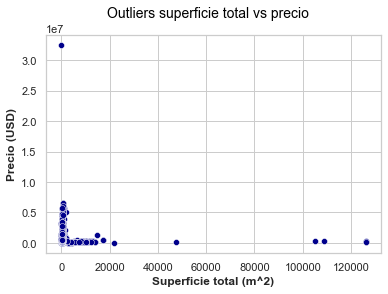

In [ ]:
Q1 = df_properati_filter[['rooms','bedrooms','bathrooms','surface_total','surface_covered', 'price']].quantile(0.25)
Q3 = df_properati_filter[['rooms','bedrooms','bathrooms','surface_total','surface_covered', 'price']].quantile(0.75)
IQR = Q3 - Q1

df_properati_outliers = df_properati_filter[((df_properati_filter < (Q1 - 1.5 * IQR)) |(df_properati_filter > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.suptitle("Outliers superficie total vs precio", fontsize=14, color = "black")

sns.scatterplot(data=df_properati_outliers, x="surface_total", y="price", color="darkblue")

plt.xlabel("Superficie total (m^2)", fontweight = "black", fontsize = 12)
plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 12)


El scatterplot de esta manera me permite afirmar que tenemos valores extremos que son el caso de un precio bajo pero la mayor cantidad de metros totales o al reves el precio más alto con uno de los valores más pequeños de superficie.

Conociendo el mercado argentino y en base al análisis realizado por region, localidad y tipo de propiedad, deberíamos ver como se comporta la superficie vs el precio por region y tipo de vivienda. Para obtener mayor claridad modificamos la escala, agrupamos por tipo de vivienda y observamos cada región por separado.  


**Outliers superficie total vs precio por tipo de vivienda**

Departamento    7825
PH              1574
Casa            1317
Name: property_type, dtype: int64


Text(20.491792708333335, 0.5, 'Precio (USD)')

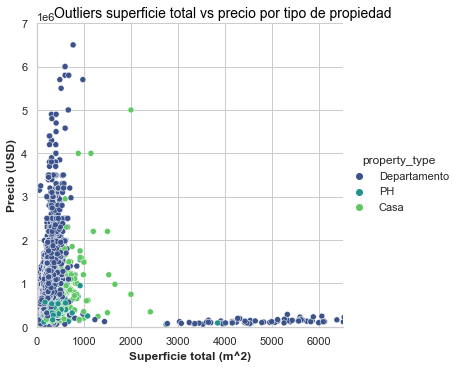

In [ ]:
print(df_properati_outliers['property_type'].value_counts())

sns.relplot(
    data=df_properati_outliers, x="surface_total", y="price",
    hue="property_type",
    palette="viridis",
    kind="scatter"
)

plt.suptitle("Outliers superficie total vs precio por tipo de propiedad", fontsize=14, color = "black")

plt.xlim(0,6500)
plt.ylim(0,7e6)

plt.xlabel("Superficie total (m^2)", fontweight = "black", fontsize = 12)
plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 12)

**Outliers Analysis Findings**
* There are abnormal values. Examples include the property with the maximum price but a minimal surface area, or the property with the largest surface area having one of the lowest prices.
* The region and property type influence these values. In the case of Capital Federal, the main excluded values were apartments.
* Considering the entire dataset, we see that 11.2% of apartments, 16.3% of PHs, and 64.7% of houses from this region are excluded as outliers.
* 64.7% of house records fall within the outliers range. This could indicate the possibility of errors in some values within these records.

#### Pairplot of rooms, bedrooms, bathrooms, surface_total, surface_covered, and price

We will create a pairplot that shows the relationship between `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, and `price` grouped by property type.

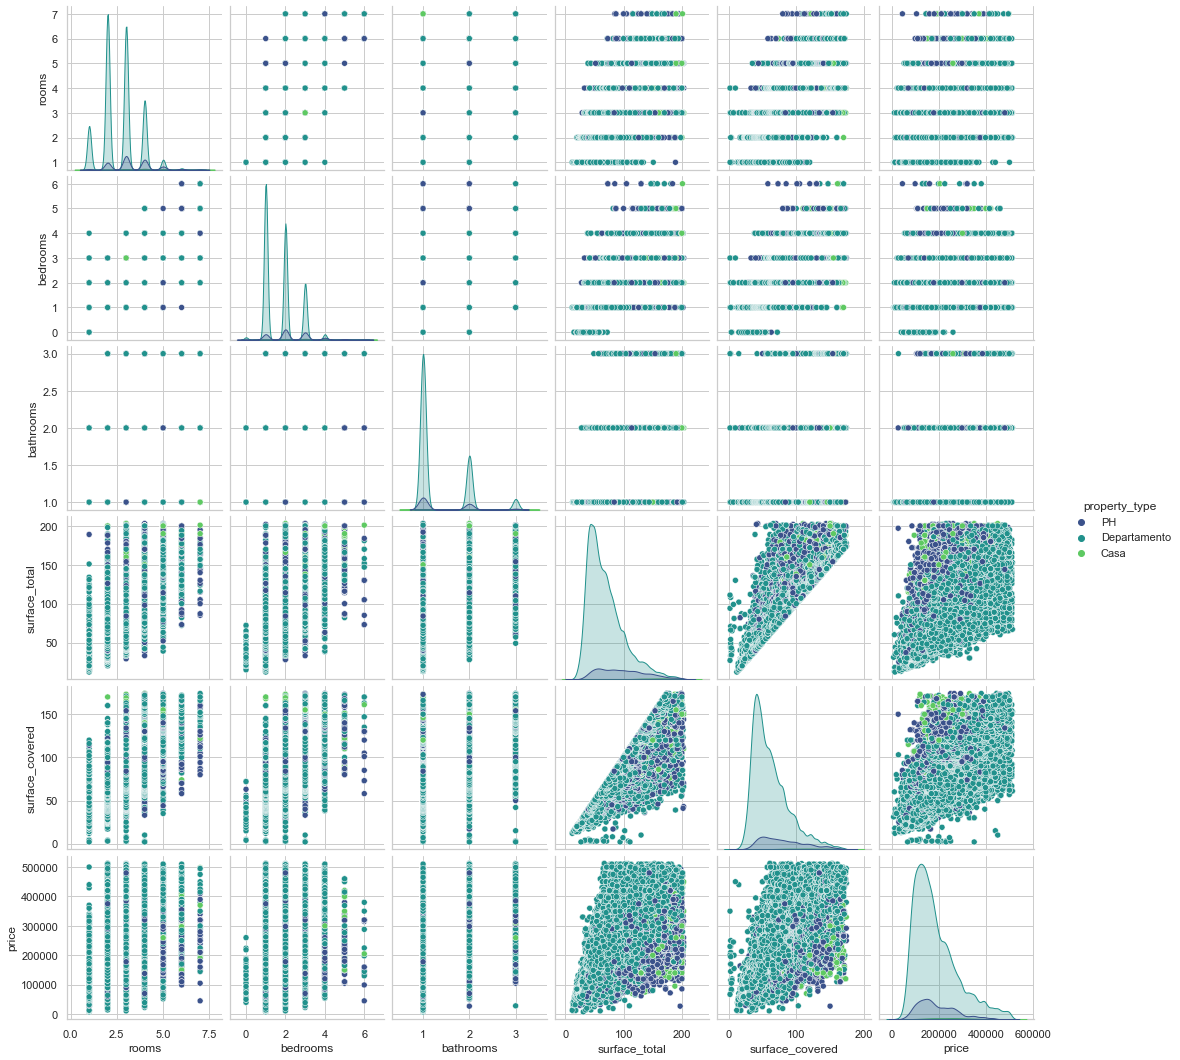

In [ ]:
df_properati_final = df_properati_selection[['rooms','bedrooms','bathrooms','surface_total','surface_covered', 'price', 'region', 'property_type']]

sns.pairplot(df_properati_final, hue = "property_type", palette="viridis")

The pairplot with the price variable is showing how the property type influences the other variables. Therefore, it seems appropriate to zoom in and compare price vs. total surface area or rooms for each property type. We will focus on these two variables because if we compare the graph of price vs. rooms with price vs. bedrooms, they are very similar to each other. The same applies to the surface-related graphs.

Finally, we will analyze a graph that includes **price, total surface area, and rooms by property type**.

Superficie total vs precio para cada tipo de propiedad


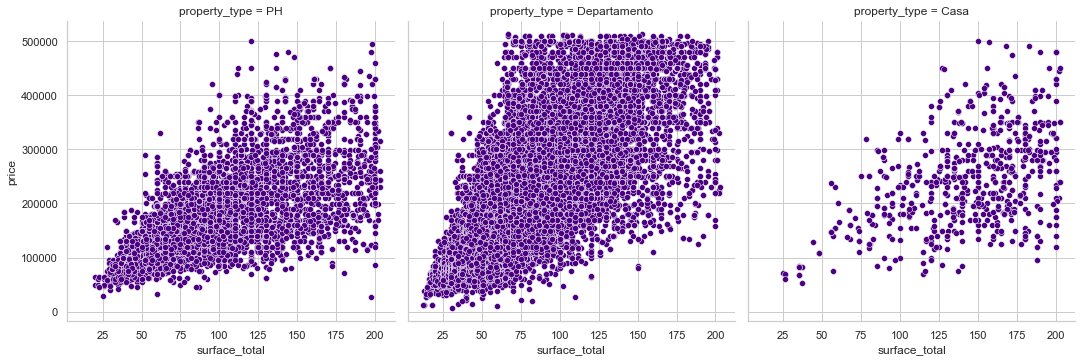

In [ ]:
# Gráficamos el precio vs la superficie para cada tipo de propiedad
print("Superficie total vs precio para cada tipo de propiedad")

sns.relplot(
    data=df_properati_final, x="surface_total", y="price",
    col="property_type",
    color="indigo",
    kind="scatter"
)


* PH: The values are mostly located in a range between 0 to 300,000 USD and 24 to 200 m².
* Apartment: They are easily identifiable and these properties have a price range up to 500,000 USD.
* House: Properties of this type are much more dispersed compared to the other two cases.

Superficie cubierta vs precio para cada tipo de propiedad


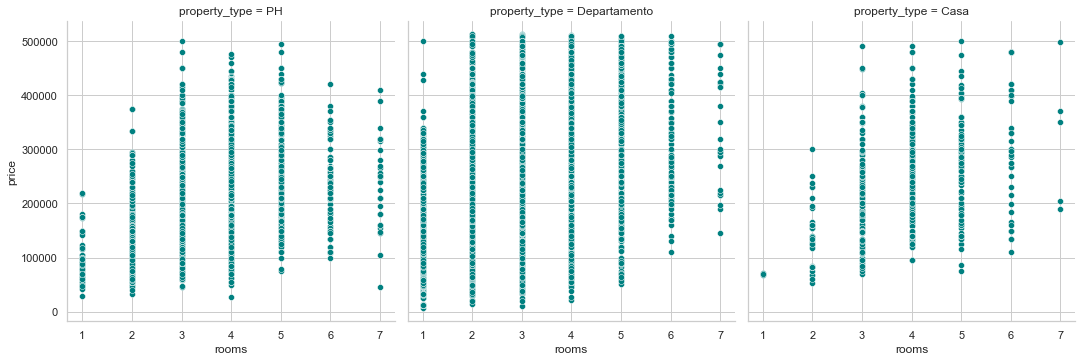

In [ ]:
# Gráficamos el precio vs la superficie cubierta para cada tipo de propiedad
print("Superficie cubierta vs precio para cada tipo de propiedad")

sns.relplot(
    data=df_properati_final, x="rooms", y="price",
    col="property_type",
    color="teal",
    kind="scatter"
)

Higher number of rooms corresponds to a higher price.

Superficie cubierta vs precio por habitaciones para cada tipo de propiedad


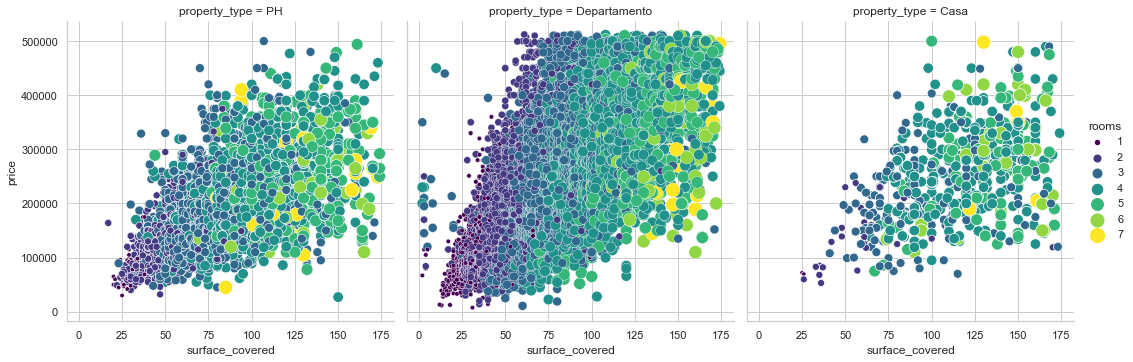

In [ ]:
# Gráficamos el precio vs la superficie cubierta para cada tipo de propiedad y habitaciones
print("Superficie cubierta vs precio por habitaciones para cada tipo de propiedad")

sns.relplot(
    data=df_properati_final, x="surface_covered", y="price",
    col="property_type",
    hue="rooms",
    palette="viridis",
    kind="scatter",
    size="rooms",
    sizes=(20, 200)
)

**Conclusions from Distributions and Pairwise Relationships**
* It's necessary to apply the IQR method since we have outliers that are significantly distant from the majority of our values in terms of scale.
* There are some outlier values.
* There is a relationship between price, total surface area, and number of rooms, which is more evident in the last graph we created.

#### Correlations

Text(0.5, 1.0, 'Coeficientes de correlación (Pearson)')

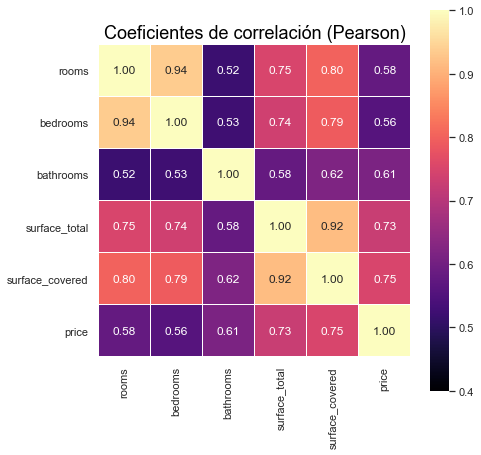

In [ ]:
df_corr = df_properati_final.corr()

plt.figure(figsize = (7,7))
sns.heatmap(df_corr,
            vmin=0.4, vmax=1,
            annot=True,
            fmt= '.2f',
            linewidths=.5,
            cmap="magma",
            square = True,
            annot_kws={'size': 12})


plt.title("Coeficientes de correlación (Pearson)", fontsize = 18, color = "black")

* The variables with the highest correlation are rooms vs. bedrooms (0.94) and total surface area vs. covered surface area (0.92). This is because total surface area is composed of covered surface area plus uncovered surface area, and rooms are the sum of bedrooms, bathrooms, and possibly other spaces.
* Surface_covered and rooms have a correlation of 0.8, which confirms what we observed in the last graph where we related price, surface area, and number of rooms.
* Price and total surface area have a correlation of 0.73.
* It's important to note that none of the correlations are below 0.5.

Throughout this section, we have seen how property type influences these variables. Therefore, it seems appropriate to analyze correlation matrices for each property type.

Text(0.5, 1.0, 'PH')

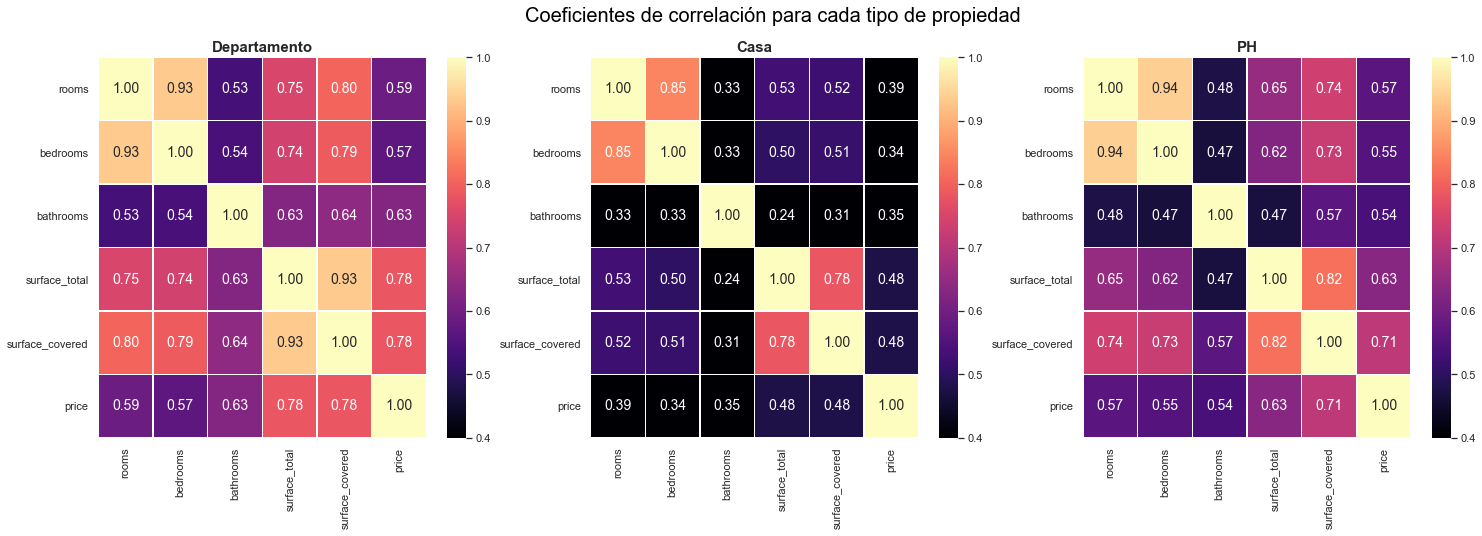

In [ ]:
# Correlaciones departamento
df_corr_departamento = df_properati_final[df_properati_final["property_type"] == 'Departamento'].corr()

#Correlaciones casa
df_corr_casa = df_properati_final[df_properati_final["property_type"] == 'Casa'].corr()

#Correlaciones PH
df_corr_ph = df_properati_final[df_properati_final["property_type"] == 'PH'].corr()

plt.figure(figsize=(25,7))
plt.suptitle("Coeficientes de correlación para cada tipo de propiedad", fontsize = 20, color = "black")

# Hetmap departamento
plt.subplot(1,3,1)
sns.heatmap(df_corr_departamento,
            vmin=0.4, vmax=1,
            annot=True,
            fmt= '.2f',
            linewidths=.5,
            cmap="magma",
            annot_kws={'size': 14})
plt.title("Departamento", fontweight = "black", fontsize = 15)

#Hetmap casa
plt.subplot(1,3,2)
sns.heatmap(df_corr_casa,
            vmin=0.4, vmax=1,
            annot=True,
            fmt= '.2f',
            linewidths=.5,
            cmap="magma",
            annot_kws={'size': 14})
plt.title("Casa", fontweight = "black", fontsize = 15)

#Hetmap PH
plt.subplot(1,3,3)
sns.heatmap(df_corr_ph,
            vmin=0.4, vmax=1,
            annot=True,
            fmt= '.2f',
            linewidths=.5,
            cmap="magma",
            annot_kws={'size': 14})
plt.title("PH", fontweight = "black", fontsize = 15)


* The **rooms vs bedrooms** correlation increased for apartments (0.93), remained the same for PHs (0.94), while for houses, it decreased to 0.85.
* The **covered surface vs total surface** correlation increased for the apartment property type, while it decreased for houses and PHs.
* The **price vs total surface** correlation increased for apartments to 0.78, decreased for PHs and houses, dropping from 0.73 to 0.48 for the latter.

### 2.3 Challenge

The major analysis was performed only for the Capital Federal region. For this section, I would like to investigate data from the other three zones: GBA Zona Norte, GBA Zona Sur, and GBA Zona Oeste. Specifically, I want to determine if:
1. There is a relationship between the zone and property type.
2. The correlation coefficients are similar or show significant variations between zones.
3. The average price per zone and property type is similar or different.

The first step will be to create a new Data Frame containing data only from these three regions.

In [ ]:
# Generamos una máscara para quedarnos con las tres regiones que nos interesan
mask_region = (df_properati['region'] != "Capital Federal")

# Nuevo Data Frame

df_challenge_properati = df_properati[mask_region]
df_challenge_properati = df_challenge_properati [['rooms','bedrooms','bathrooms','surface_total','surface_covered', 'price', 'region', 'property_type']]

# Verificamos qué este bien el DF
df_challenge_properati['region'].unique()

array(['Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Norte',
       'Bs.As. G.B.A. Zona Oeste'], dtype=object)

#### Relationship between Region and Property Type

Let's create a bar chart that shows the relationship between the number of properties and the region.

Text(0.5, 1.0, 'Cantidad de propiedades por región y tipo')

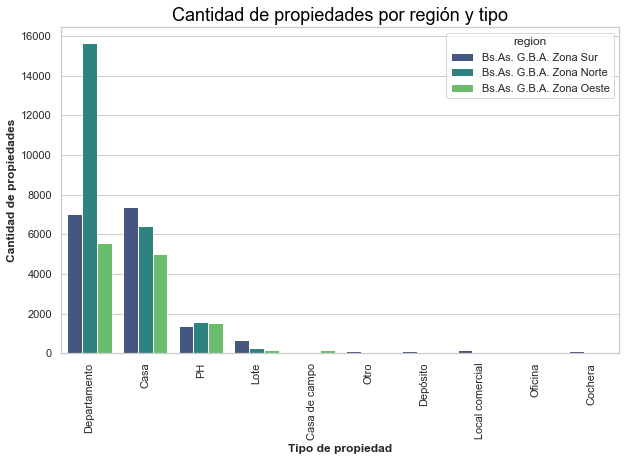

In [ ]:
plt.figure(figsize = (10,6))

graph = sns.countplot(
            data = df_challenge_properati,
            x="property_type",
            hue = 'region',
            order = df_challenge_properati['property_type'].value_counts().index,
            palette="viridis"
           )
plt.xticks(rotation = 90)
plt.xlabel("Tipo de propiedad", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por región y tipo", fontsize=18, color="black")


Conclusions:
* The majority of properties in the northern zone are apartments.
* The number of apartments in the northern zone is nearly double that of the southern and western zones.
* The highest concentration of properties in these zones is for apartments, houses, PHs, and lots.
* In the southern zone, the number of apartments and houses is similar, and the same applies to the western zone.

#### Correlation Coefficients

Text(0.5, 1.0, 'Bs.As. G.B.A. Zona Oeste')

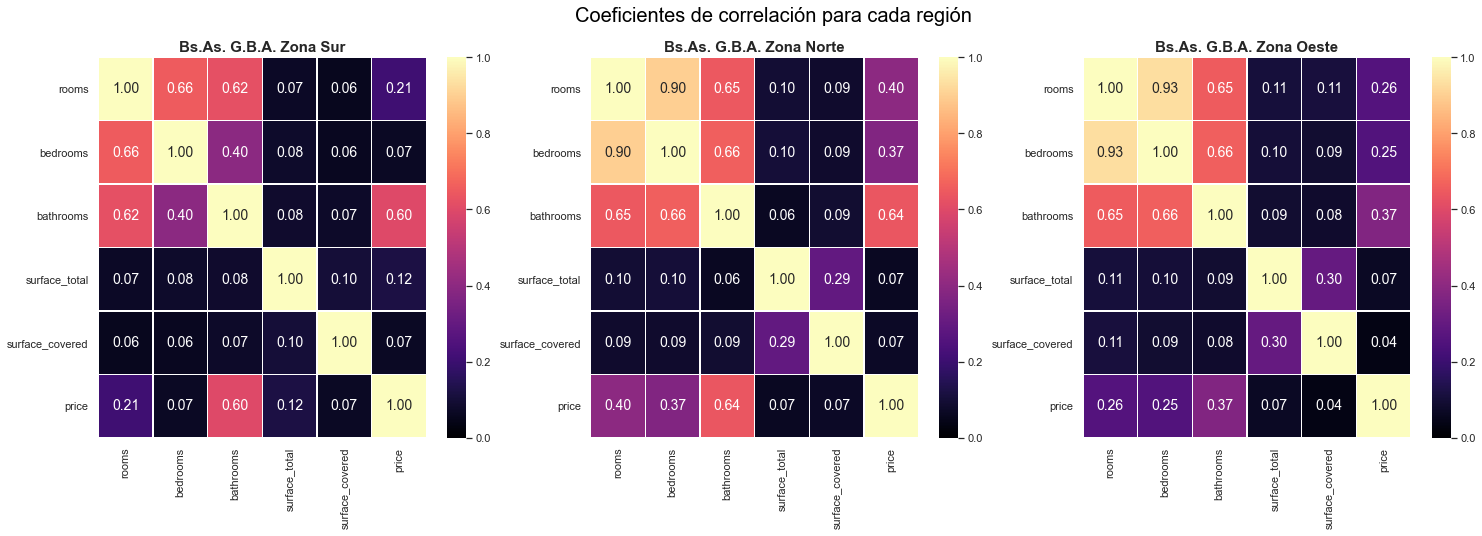

In [ ]:
# Correlaciones Zona Sur
df_corr_zona_sur = df_challenge_properati[df_challenge_properati["region"] == 'Bs.As. G.B.A. Zona Sur'].corr()

#Correlaciones casa
df_corr_zona_norte = df_challenge_properati[df_challenge_properati["region"] == 'Bs.As. G.B.A. Zona Norte'].corr()

#Correlaciones PH
df_corr_zona_oeste = df_challenge_properati[df_challenge_properati["region"] == 'Bs.As. G.B.A. Zona Oeste'].corr()

plt.figure(figsize=(25,7))
plt.suptitle("Coeficientes de correlación para cada región", fontsize = 20, color = "black")

# Hetmap Bs.As. G.B.A. Zona Sur
plt.subplot(1,3,1)
sns.heatmap(df_corr_zona_sur,
            vmin=0, vmax=1,
            annot=True,
            fmt= '.2f',
            linewidths=.5,
            cmap="magma",
            annot_kws={'size': 14})
plt.title("Bs.As. G.B.A. Zona Sur", fontweight = "black", fontsize = 15)

#Hetmap Bs.As. G.B.A. Zona Norte
plt.subplot(1,3,2)
sns.heatmap(df_corr_zona_norte,
            vmin=0, vmax=1,
            annot=True,
            fmt= '.2f',
            linewidths=.5,
            cmap="magma",
            annot_kws={'size': 14})
plt.title("Bs.As. G.B.A. Zona Norte", fontweight = "black", fontsize = 15)

#Hetmap Bs.As. G.B.A. Zona Oeste
plt.subplot(1,3,3)
sns.heatmap(df_corr_zona_oeste,
            vmin=0, vmax=1,
            annot=True,
            fmt= '.2f',
            linewidths=.5,
            cmap="magma",
            annot_kws={'size': 14})
plt.title("Bs.As. G.B.A. Zona Oeste", fontweight = "black", fontsize = 15)


Conclusions:
* Price does not correlate with either total or covered surface area for any region.
* Despite having different values, they exhibit a similar color pattern when comparing each region.

#### Average Price by Region and Property Type

([0, 1, 2],
 [Text(0, 0, 'Bs.As. G.B.A. Zona Norte'),
  Text(1, 0, 'Bs.As. G.B.A. Zona Oeste'),
  Text(2, 0, 'Bs.As. G.B.A. Zona Sur')])

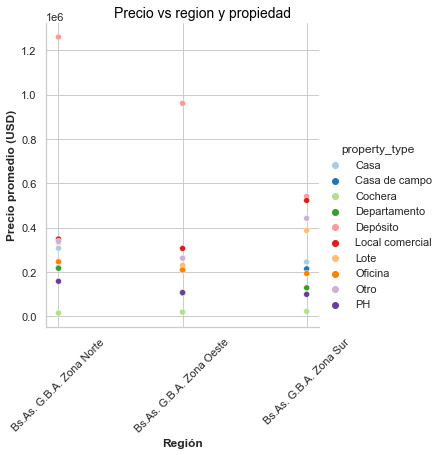

In [ ]:
df_challenge_properati_price = df_challenge_properati[['price', 'region', 'property_type']]
df_challenge_price = df_challenge_properati_price.groupby(['region','property_type'], as_index=False).mean()


sns.relplot(
    data=df_challenge_price, x="region", y="price",
    hue="property_type",
    palette="Paired",
    kind="scatter"
)

plt.suptitle("Precio vs region y propiedad", fontsize=14, color = "black")

plt.xlabel("Región", fontweight = "black", fontsize = 12)
plt.ylabel("Precio promedio (USD)", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)


In [ ]:
# Imprimimos el data frame con los precios promedios
df_challenge_price.sort_values(by=['property_type'])

,region,property_type,price
0,Bs.As. G.B.A. Zona Norte,Casa,3.067829e+05
20,Bs.As. G.B.A. Zona Sur,Casa,2.448394e+05
10,Bs.As. G.B.A. Zona Oeste,Casa,2.167508e+05
1,Bs.As. G.B.A. Zona Norte,Casa de campo,2.195524e+05
21,Bs.As. G.B.A. Zona Sur,Casa de campo,2.138232e+05
11,Bs.As. G.B.A. Zona Oeste,Casa de campo,2.075966e+05
2,Bs.As. G.B.A. Zona Norte,Cochera,1.457500e+04
22,Bs.As. G.B.A. Zona Sur,Cochera,2.225000e+04
12,Bs.As. G.B.A. Zona Oeste,Cochera,1.881034e+04
3,Bs.As. G.B.A. Zona Norte,Departamento,2.165363e+05


Conclusions:
* By analyzing the graph and the average values in the table, we can observe that the property type has a similar average price across regions.
* Since we did not exclude outlier values, the average in some cases might be influenced by high errors. Therefore, addressing outliers could potentially result in a more similar average price among property types and regions.

# 3. Machine Learning

## 3.1 Creating ML Data Frame

The new Data Frame will meet the following conditions:
1. Properties in Capital Federal and with property types Apartment, PH, or House.
2. Total surface area is less than 1000 m² and greater than 15 m².
3. Price is less than 4,000,000 dollars.
4. Select the columns: rooms, bedrooms, bathrooms, surface_total, surface_covered, and price.
5. Discard instances with missing values.

In [ ]:
# Traemos el Data Frame
df_properati

# Máscara de Capital Federal
mask_caba = df_properati['region'] == "Capital Federal"

# Máscara de Tipo de Propiedad
mask_property_type = df_properati['property_type'].isin(["Departamento","Casa","PH"])

# Máscara de Superficie Total
mask_surface_total = df_properati['surface_total'].between(15,1000)

#Máscara de Precio
mask_price = df_properati['price'] <= 4000000

# Data Frame con condiciones

df_properati_mask = df_properati[(mask_caba) & (mask_property_type) & (mask_surface_total) & (mask_price)]

# Seleccionamos las variables a estudiar

df_properti_ml = df_properati_mask[['rooms','bedrooms','bathrooms','surface_total','surface_covered', 'price']]

# Eliminamos los valores nulos
df_properati_ml = df_properti_ml.dropna()


In [ ]:
print("Cantidad de instancias y columnas:",df_properati_ml.shape)

Cantidad de instancias y columnas: (81019, 6)


## 3.2 Selection of Evaluation Metric

It's not possible to implement classification metrics like **accuracy, ROC-AUC, log-loss, confusion matrix, or F1 score** because the goal of our models is not to classify properties, but to predict a price. In other words, it's not a classification problem. This is why the most suitable metrics for evaluating the performance of our future models are **Mean Absolute Error (MAE)** or **Mean Squared Error (MSE)**.

**MAE**
It gives us a measure of how far the predictions are from the actual outcome. However, it doesn't give us any idea whether we are predicting data below or above the expected values.

**MSE**
It's similar to MAE, the only difference is that MSE takes the average of the squared difference between the original values and the predicted values. The advantage of MSE is that it's easier to calculate the gradient, whereas Mean Absolute Error requires complicated linear programming tools to calculate the gradient. As we square the error, the effect of larger errors becomes more pronounced than smaller errors, so the model can now focus more on larger errors.

However, MSE has a small drawback, which is that since the error is squared, it doesn't have the same magnitude or units as the variable y. Therefore, the root of the mean squared error (RMSE) is often used. This is why the **evaluation metric** we will implement to judge model performance will be **RMSE**.

We will aim for a small RMSE value, and what is considered "small" will be determined by the business and the problem itself. In other words, having an RMSE of 1 million may not be a good value, whereas having an RMSE between 100K or 500K might be considered low.

We will also want the training and testing curves of our model to be as similar as possible because if the RMSE for the test set is much higher than that of the training set, it's likely that the model has overfit the data.

We will evaluate RMSE through 3 important components:
* Calculating RMSE for each set (train and test).
* Creating a scatter plot of  𝑦  vs  𝑦𝑝𝑟𝑒𝑑𝑖𝑐ℎ𝑜  for the test set.
* Creating a histogram of errors ( 𝑦−𝑦𝑝𝑟𝑒𝑑𝑖𝑐ℎ𝑜 ) for each set.

To perform all of this, we will use `mean_squared_error` from sklearn:
```python
from sklearn.metrics import mean_squared_error
```

## 3.3 Variable Selection and Train/Test Split

The **features X** that we will use to determine the price are:
* Total surface area or `surface_total`
* Covered surface area or `surface_covered`
* Number of rooms or `rooms`

The target variable *y* is the **price or `price`**

We select these features because in the case of surface areas, they have a correlation greater than 70%, while rooms conceptually should be the sum of bedrooms and bathrooms from the list of variables.

We will proceed to split the data into training and testing sets.


In [ ]:
# Definimos las features
X = df_properati_ml[['surface_total','surface_covered', 'rooms']]

# Definimos la variable objetivo
y = df_properati_ml['price']

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## 3.4 Benchmark

We will perform the benchmark using a **linear regression model**. We decided to implement this model because we observed from the exploratory data analysis that the price and surface area tend to have a linear relationship. In addition, the features have a high correlation with the target variable (as detailed in section 3.3). However, we believe that the results may not be optimal due to the significant variability among the features.

We will use the variables defined earlier and use the test split values to train and predict our model. Let's proceed with the implementation:

In [ ]:
# Creamos modelo de regresión lineal

from sklearn.linear_model import LinearRegression

linear_model_bm = LinearRegression()

In [ ]:
# Entrenamos el modelo
linear_model_bm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predecimos con el modelo
y_test_pred_bm = linear_model_bm.predict(X_test)
y_train_pred_bm = linear_model_bm.predict(X_train)

Let's now examine the obtained errors. We will perform all these steps in the same cell, but it consists of three important components:

1. Calculation of RMSE for each set (train and test).
2. A scatter plot of  𝑦  vs  𝑦𝑝𝑟𝑒𝑑𝑖𝑐ℎ𝑜  for the test set.
3. A histogram of errors ( 𝑦−𝑦𝑝𝑟𝑒𝑑𝑖𝑐ℎ𝑜 ) for each set.

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_train_bm = np.sqrt(mean_squared_error(y_train, y_train_pred_bm))
rmse_test_bm = np.sqrt(mean_squared_error(y_test, y_test_pred_bm))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_bm}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_bm}')

Raíz del error cuadrático medio en Train: 216100.04839625128
Raíz del error cuadrático medio en Test: 218828.84579543446


/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


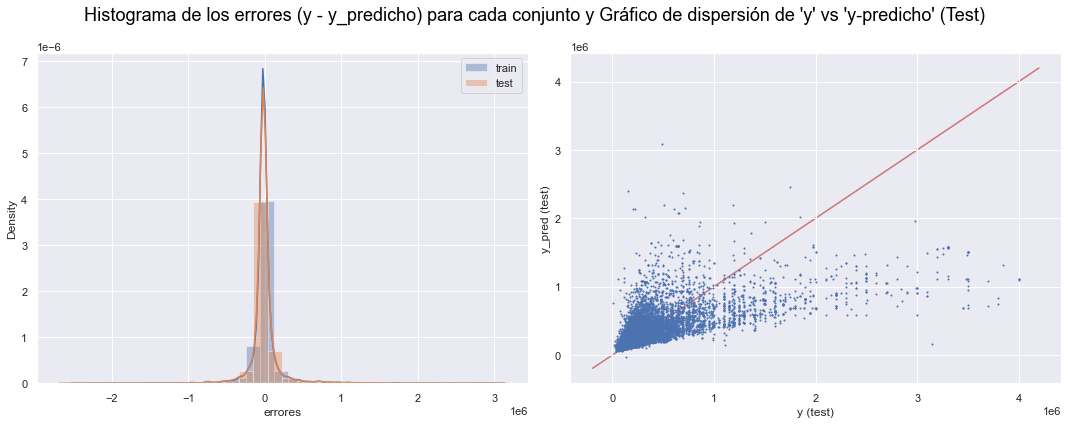

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_bm, bins = 30, label = 'train', kde=True)
sns.distplot(y_test - y_test_pred_bm, bins = 30, label = 'test', kde=True)
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_bm, s =1)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0,c='r')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

**Conclusions**
1. The RMSE values represent the overall error of the regressor. They are nearly identical for both the test and train sets, indicating that there might be overfitting.
2. The histograms of errors are symmetric, approximately Gaussian, and nearly identical for both sets. This suggests that we are approximating our data quite well.
3. In the scatter plot of $y$ vs $y_{predicted}$ for the test set, not all points are close to the diagonal (the relation $y = x$). Additionally, the error appears to be diverse across the plot, similar throughout the entire range of possible values.

## 3.5 Machine Learning Models
In this section, we will create two machine learning models: k-Nearest Neighbors (KNN) and Decision Tree. The procedure to be implemented for both models is the same and consists of the following steps:
1. Create the model object, either a Decision Tree or k-Nearest Neighbors.
2. Train the models using our test dataset.
3. Make predictions and evaluate the models.
4. Calculate the error.

### k-Nearest Neighbors
As a hyperparameter, we will specify the number of neighbors as 20.

In [ ]:
# Creamos modelo de vecinos cercanos

from sklearn.neighbors import KNeighborsRegressor

clf_knn = KNeighborsRegressor(n_neighbors=20)

In [ ]:
# Entrenamos el modelo
clf_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:
# Predecimos con el modelo
y_test_pred_knn = clf_knn.predict(X_test)
y_train_pred_knn = clf_knn.predict(X_train)

In [ ]:
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_knn}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_knn}')

Raíz del error cuadrático medio en Train: 160923.7497628722
Raíz del error cuadrático medio en Test: 172429.27772116402


/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


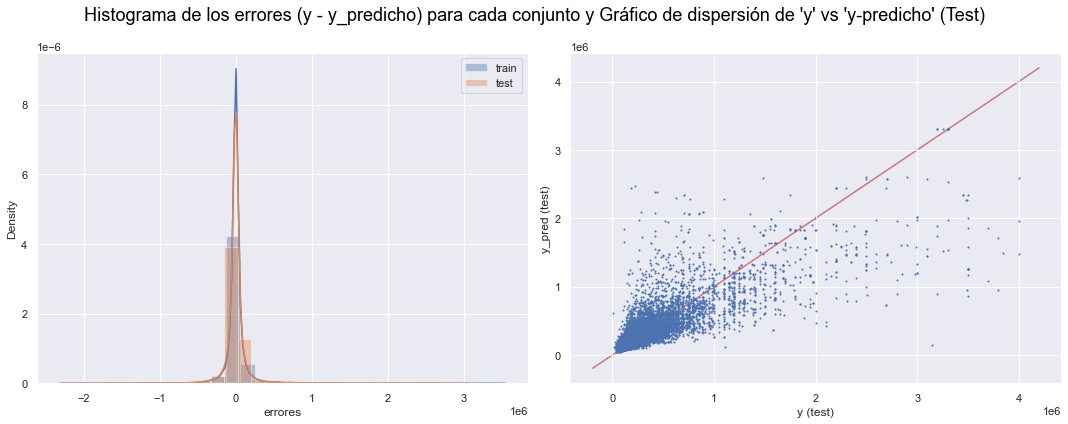

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_knn, bins = 30, label = 'train', kde=True)
sns.distplot(y_test - y_test_pred_knn, bins = 30, label = 'test', kde=True)
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_knn, s =1)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0,c='r')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

**Conclusions**
* Compared to our Benchmark model, our k-Nearest Neighbors model has a better RMSE, as its value is lower than that of linear regression.
* It exhibits less overfitting, as seen in the distribution curves and the histogram.
* The scatter plot, on the other hand, is similar in both cases.

### Decision Tree
We will create a decision tree with a depth of 10.

In [ ]:
# Creamos el objeto de árbol

from sklearn.tree import DecisionTreeRegressor
clf_tree = DecisionTreeRegressor(max_depth = 10)

In [ ]:
# Entrenamos el modelo
clf_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [ ]:
# Predecimos con el modelo
y_test_pred_tree = clf_tree.predict(X_test)
y_train_pred_tree = clf_tree.predict(X_train)

In [ ]:
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_tree}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_tree}')

Raíz del error cuadrático medio en Train: 134293.44456896625
Raíz del error cuadrático medio en Test: 169819.70219674768


/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


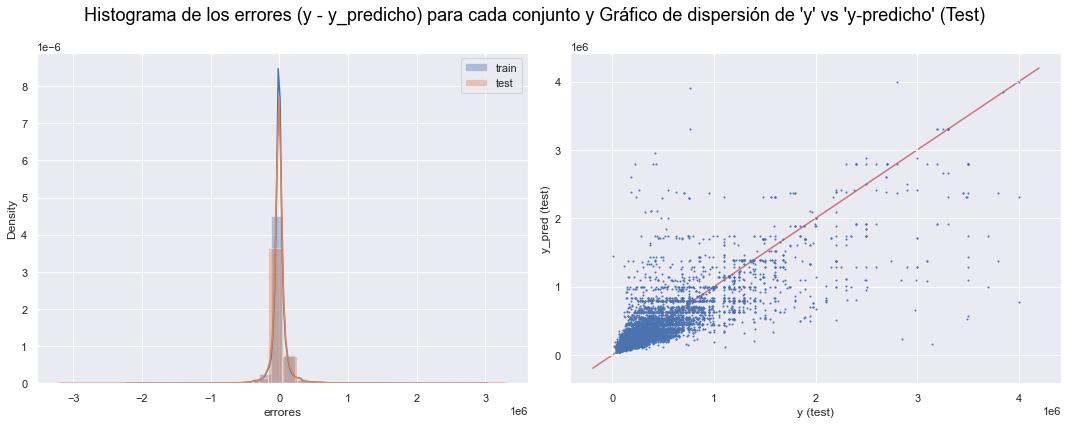

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_tree, bins = 30, label = 'train', kde=True)
sns.distplot(y_test - y_test_pred_tree, bins = 30, label = 'test', kde=True)
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_tree, s =1)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0,c='r')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

**Conclusions**
* This model has the best **RMSE ~134293** among the three models created so far. Therefore, we could say that it currently performs the best.

## 3.6 Optimal Values for Each Model
In this section, we will calculate the optimal values for the number of neighbors and the depth for the respective models.

### k-Nearest Neighbors

Text(0.5, 1.0, 'Rmse para distintos números de vecinos')

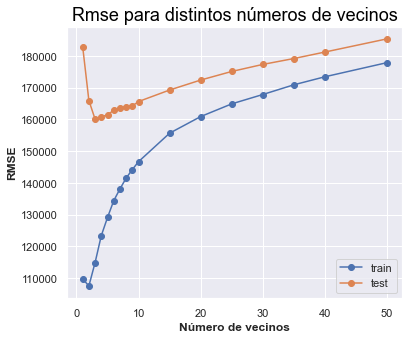

In [ ]:
lista_rmse_train = []
lista_rmse_test = []

k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:

    clf = KNeighborsRegressor(n_neighbors= k)

    # Entrenar el modelo
    clf.fit(X_train, y_train)

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

# Graficamos
plt.figure(figsize = (6,5))
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos números de vecinos", fontsize = 18, color = "black")

**Conclusions**
Given that the test and train curves are so separated in the interval from 0 to about 15 neighbors, it would not be advisable to use a value lower than 15 for this model. From around 15 neighbors, we can see that the curves have a similar behavior but are displaced in distance. However, with a higher number of neighbors, the RMSE increases. We could consider reducing k to a value between 20 and 15 to improve the performance of this model, although we would not achieve the same RMSE as obtained in the decision tree model.

### Decision Tree

Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

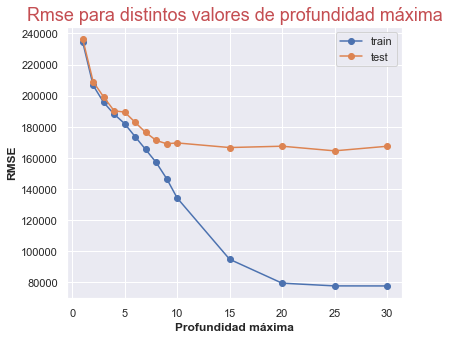

In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]

# Generamos en loop sobre los distintos valores de profundidad
for max_depth in max_depths:

    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeRegressor(max_depth = max_depth)

    # Entrenar el modelo
    clf.fit(X_train,y_train)

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)


plt.figure(figsize = (6,5))
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

**Conclusion**
* The curves have a decreasing behavior with a lower RMSE as the depth increases, but we can see how the distance between them increases as the depth increases. Therefore, it is not advisable to exceed a depth of 10.
* Up to a depth of about 10, both the test and train curves are very similar. Beyond this depth, the curves separate significantly. The difference between depth 10 and 15 suggests that selecting a value higher than 10 could lead to overfitting.
* We could improve this model by reducing the depth to a value between 6 and 10, which would increase the RMSE but improve its prediction. This increase would still indicate that this type of model performs better than the previous ones.

#### Importance of Features in Decision Tree



/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


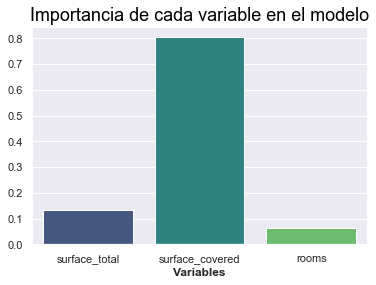

In [ ]:
importances = clf_tree.feature_importances_
columns = X.columns

sns.barplot(columns,
            importances,
            palette="viridis")
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "black")
plt.show()

## 3.7 Model Selection
The model I would choose is the **decision tree with a depth between 6 and 10**.

This decision is based on the following reasons:
* This model has the lowest RMSE, approximately 134293, among the three implemented.
* We could reduce its depth to improve prediction with a slightly increased RMSE, which would still be lower than the other two models.
* The gap between the test and training curves is not as large compared to the k-nearest neighbors model, and the curves are not overlapping.
* The histograms of the errors are symmetric, approximately Gaussian, and almost identical for both sets. This indicates that we are approximating our data in the best way.

Furthermore, considering that the covered area variable has a weight of 80% compared to the other two variables, I believe we should add more features.

## 3.7 New Features
In the context of the Argentine property market, considering only surface area and the number of rooms would introduce bias or result in a model that does not reflect reality. It is well-known that location, primarily, and to a lesser extent, the type of property, have a significant impact on determining property prices.
If we combine our business knowledge with the data analysis we've conducted, much of the research has highlighted the importance of location and property type in relation to price.

Since both location and property type are categorical variables, we would need to transform them into numerical variables. We could use latitude and longitude, which are numeric fields that indicate location.

The proposal is to create another decision tree model, this time including `lat` and `lon` as features.

In [ ]:
# Seleccionamos las variables a estudiar

df_properati_ml2 = df_properati_mask[['rooms','bedrooms','bathrooms','surface_total','surface_covered', 'price', 'lon', 'lat']]

# Eliminamos los valores nulos
df_properati_ml2 = df_properati_ml2.dropna()

In [ ]:
df_properati_ml2.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,lon,lat
0,7.0,7.0,2.0,140.0,140.0,153000.0,-58.384949,-34.605880
1,2.0,1.0,2.0,70.0,58.0,159000.0,-58.412110,-34.624056
2,2.0,1.0,1.0,45.0,45.0,125000.0,-58.427474,-34.593569
3,2.0,1.0,1.0,85.0,50.0,295000.0,-58.436754,-34.581294
5,2.0,1.0,1.0,56.0,56.0,150000.0,-58.441239,-34.593779


In [ ]:
# Definimos las features
X_tree = df_properati_ml2[['surface_total','surface_covered', 'rooms','lon','lat']]

# Definimos la variable objetivo
y_tree = df_properati_ml2['price']

In [ ]:
# Split train/test
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.30, random_state=42)

In [ ]:
# Creamos el objeto del árbol dos
clf_tree_2 = DecisionTreeRegressor(max_depth = 10)

In [ ]:
# Entrenamos el modelo
clf_tree_2.fit(X_train_tree, y_train_tree)

DecisionTreeRegressor(max_depth=10)

In [ ]:
# Predecimos con el modelo
y_test_pred_tree_2 = clf_tree_2.predict(X_test_tree)
y_train_pred_tree_2 = clf_tree_2.predict(X_train_tree)

In [ ]:
# RMSE
rmse_train_tree_2 = np.sqrt(mean_squared_error(y_train_tree, y_train_pred_tree_2))
rmse_test_tree_2 = np.sqrt(mean_squared_error(y_test_tree, y_test_pred_tree_2))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_tree_2}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_tree_2}')

Raíz del error cuadrático medio en Train: 80332.09726516985
Raíz del error cuadrático medio en Test: 101641.03592115182


/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


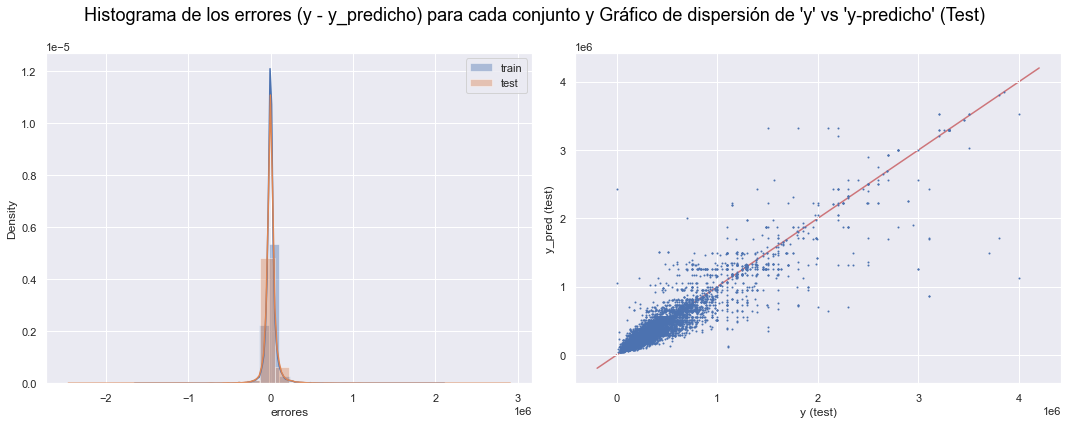

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "black")

plt.subplot(1,2,1)
sns.distplot(y_train_tree - y_train_pred_tree_2, bins = 30, label = 'train', kde=True)
sns.distplot(y_test_tree - y_test_pred_tree_2, bins = 30, label = 'test', kde=True)
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test_tree,y_test_pred_tree_2, s =1)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0,c='r')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


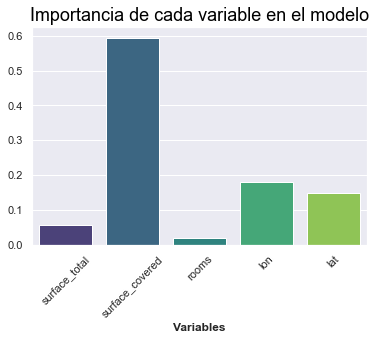

In [ ]:
# Importancia de las variables
importances_tree = clf_tree_2.feature_importances_
columns_tree = X_tree.columns

sns.barplot(columns_tree,
            importances_tree,
            palette="viridis")
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "black")
plt.xticks(rotation = 45)
plt.show()

**Conclusion**

The latitude and longitude features are more important than the surface area and number of rooms. This is mainly due to the fact that the location of the property is an influential factor in determining its price in the Argentine market.

The RMSE decreased after adding the latitude and longitude variables, although the values are still relatively high.

We should continue improving our model, and to do that, we could consider:
* Outlier handling
* Encoding for property type
* Cross-validation

These additional steps might help us create a more accurate predictive model for property prices.